# Introduction
This week I will take a role as an Analytics Engineer at Bati Bank, I find myself at the crossroads of finance and data science. Bati Bank, with over a decade of financial expertise, has forged a strategic alliance with an emerging eCommerce powerhouse. the goal is to introduce a buy-now-pay-later service, granting customers credit—provided they meet certain criteria. My task will be to :
- Construct a robust Credit Scoring Model using the data generously shared by our eCommerce partner.

But what exactly is credit scoring? It’s the art of quantifying risk—the process of assessing how likely a borrower is to default on their obligations in the future. Traditionally, lenders build credit scoring models by analyzing historical data from previous borrowers. These models then evaluate potential loan applicants based on similar information. The outcome? Either a credit score representing an applicant’s creditworthiness or a prediction of their likelihood of defaulting.

# Flow
CRISP-DM Process Flow
The CRISP-DM (Cross Industry Standard Process for Data Mining) methodology is a robust and comprehensive data mining process model that outlines six major phases:

- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment




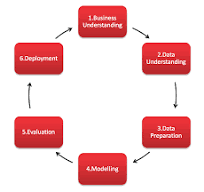

# Business understanding
## The Business Need:
- Bati Bank’s move into the buy-now-pay-later space is strategic. We aim to offer seamless credit experiences to eCommerce customers.
- Our challenge? Identifying creditworthy customers efficiently. Responsible lending is our mantra.

## Credit Scoring Essentials:
- Basel II Capital Accord—the global regulatory compass—guides us. It ensures prudent risk management and capital adequacy.
- Our mission: create a product that achieves several critical objectives:
  - Proxy Variable Definition: Categorize users as high risk (bad) or low risk (good). This classification guides lending decisions.
  - Feature Selection: Identify observable features (variables) strongly correlated with defaults. These features become predictors.
  - Risk Probability Model: Estimate risk probability for new customers. Will they tread the path of honor or veer into default territory?
  - Credit Score Model: Translate risk probabilities into credit scores. A high score signals trustworthiness.
  - Loan Optimization Model: Predict optimal loan amounts and durations. Balancing risk and customer needs is key.
  

# Data Understanding


## Import Data and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df=pd.read_csv('data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
df['AccountId']=df['AccountId'].str.split('_').str[1]
df['AccountId']=df['AccountId'].astype(int)
df['BatchId']=df['BatchId'].str.split('_').str[1]
df['BatchId']=df['BatchId'].astype(int)
df['SubscriptionId']=df['SubscriptionId'].str.split('_').str[1]
df['SubscriptionId']=df['SubscriptionId'].astype(int)
df['CustomerId']=df['CustomerId'].str.split('_').str[1]
df['CustomerId']=df['CustomerId'].astype(int)
df['ProviderId']=df['ProviderId'].str.split('_').str[1]
df['ProviderId']=df['ProviderId'].astype(object)
df['ProductId']=df['ProductId'].str.split('_').str[1]
df['ProductId']=df['ProductId'].astype(object)
df['ChannelId']=df['ChannelId'].str.split('_').str[1]
df['ChannelId']=df['ChannelId'].astype(object)
df['TransactionId']=df['TransactionId'].str.split('_').str[1]
df['TransactionId']=df['TransactionId'].astype(int)
df['FraudResult']=df['FraudResult'].astype(object)
df['CountryCode']=df['CountryCode'].astype(object)
df['Amount']=df['Amount'].astype(float)
df['Value']=df['Value'].astype(float)
df['PricingStrategy']=df['PricingStrategy'].astype(object)
df['TransactionStartTime']=pd.to_datetime(df['TransactionStartTime'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  int64              
 1   BatchId               95662 non-null  int64              
 2   AccountId             95662 non-null  int64              
 3   SubscriptionId        95662 non-null  int64              
 4   CustomerId            95662 non-null  int64              
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  object             
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

### Catagorical data
- CurrencyCode
- CountryCode
- ProviderId
- ProductId
- ProductCategory
- ChannelId
- TransactionStartTime
- PricingStrategy
- FraudResult



### Numerical data
- TransactionId
- BatchId
- AccountId
- SubscriptionId
- CustomerId
- Amount
- Value

In [5]:
for col in df:
    print(f"{col}: {df[col].nunique()}")


TransactionId: 95662
BatchId: 94809
AccountId: 3633
SubscriptionId: 3627
CustomerId: 3742
CurrencyCode: 1
CountryCode: 1
ProviderId: 6
ProductId: 23
ProductCategory: 9
ChannelId: 4
Amount: 1676
Value: 1517
TransactionStartTime: 94556
PricingStrategy: 4
FraudResult: 2


from the info we can see that the country and the currency Point to Uganda,

In [6]:
# Information about number of row and column (variable)

print('The number of row in the data is :', df.shape[0])
print('The number of columns (variable) in the data is :', df.shape[1])

The number of row in the data is : 95662
The number of columns (variable) in the data is : 16


# Exploratory Data Analysis

#### Data Summary

In [7]:
# Numerical Data Summary

df.describe()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,Amount,Value
count,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,9.566200e+04,9.566200e+04
mean,70334.481581,70526.339173,3361.571648,3023.115845,3126.883590,6.717846e+03,9.900584e+03
std,40626.774116,40586.254942,1560.040065,1293.973071,1650.972455,1.233068e+05,1.231221e+05
min,1.000000,2.000000,1.000000,2.000000,1.000000,-1.000000e+06,2.000000e+00
25%,35235.250000,35468.500000,2203.000000,2067.000000,1875.000000,-5.000000e+01,2.750000e+02
50%,70319.500000,70614.000000,3919.000000,3829.000000,3124.000000,1.000000e+03,1.000000e+03
75%,105542.750000,105627.750000,4841.000000,3829.000000,4229.000000,2.800000e+03,5.000000e+03
max,140681.000000,139493.000000,4841.000000,4836.000000,7479.000000,9.880000e+06,9.880000e+06


In [8]:
# Categorical Data Summary

df.describe(include='O')

,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662,95662
unique,1,1,6,23,9,4,4,2
top,UGX,256,4,6,financial_services,3,2,0
freq,95662,95662,38189,32635,45405,56935,79848,95469


#### Visualization of Categorical Data

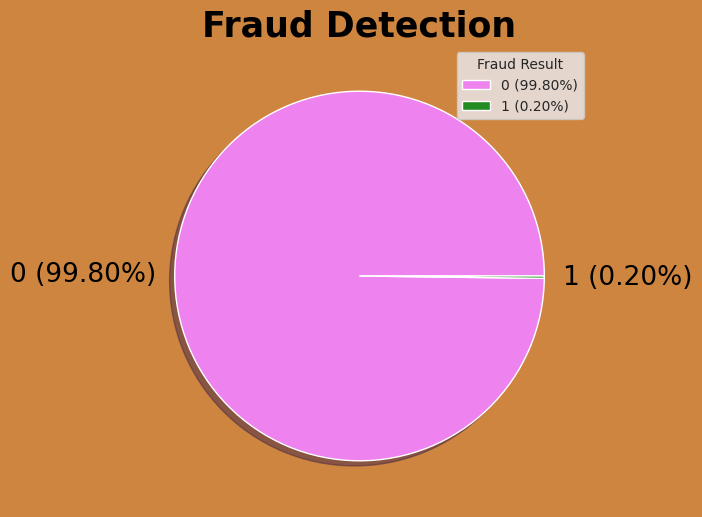

In [9]:
plt.figure(figsize=(9,6), facecolor='peru')
fraud = df['FraudResult'].value_counts()
colors = ['violet', 'forestgreen']
sns.set_style('darkgrid')

# Calculate the percentages
total = fraud.sum()
percentages = [(count / total) * 100 for count in fraud]

plt.pie(fraud, labels=[f"{label} ({percentage:.2f}%)" for label, percentage in zip(fraud.index, percentages)], colors=colors, shadow=True, textprops=dict(color='Black', fontsize=19))
plt.title("Fraud Detection", color='Black', loc='center', weight='bold', fontsize=25)
plt.legend(title='Fraud Result')
plt.show()

Based on the data, 99.8% of transaction is not fraud, while only 0.2% of transaction is fraud.

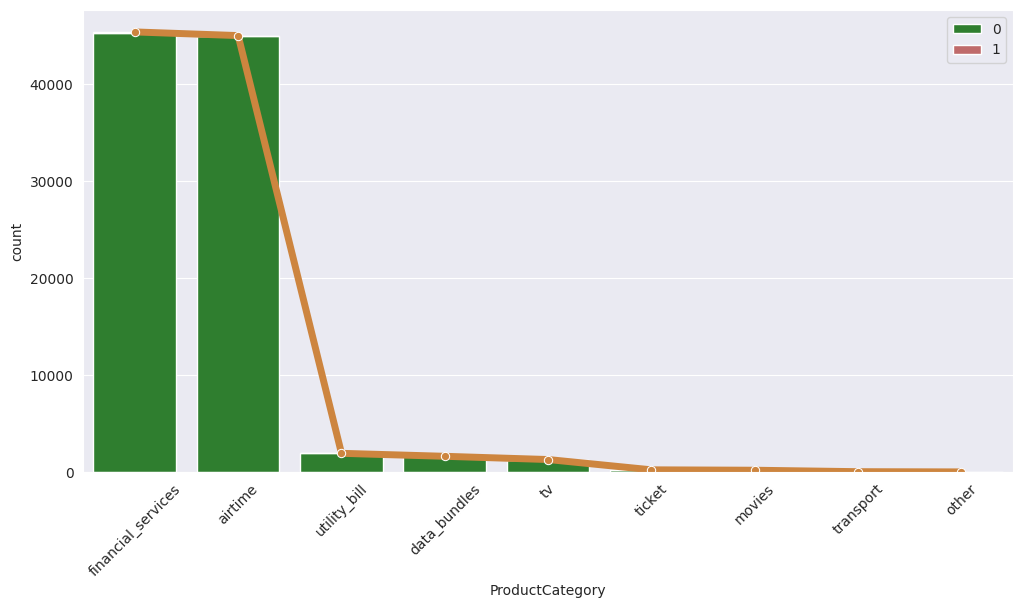

In [10]:
line_plot = df['ProductCategory'].value_counts()
product = df.groupby(['ProductCategory','FraudResult'])['ChannelId'].count().reset_index()
product = product.pivot_table(index='ProductCategory', columns='FraudResult', values='ChannelId').sort_values(by=0, ascending=False)

plt.figure(figsize=(12,6))
sns.lineplot(data=line_plot, marker='o', sort=False, color='peru', estimator=None, linewidth=5)
sns.barplot(x =product.index, y =product[0], color = 'forestgreen', label=0)
# Ensure both y and bottom have the same categories by filling missing values
product_filled = product.fillna(0)
sns.barplot(x =product_filled.index, y =product_filled[1], color = 'indianred', label=1, bottom=product_filled[0])
plt.xticks(rotation=45)
plt.show()

In [11]:
new_color_list = [
    'turquoise',
    'salmon',
    'gold',
    'mediumseagreen',
    'orchid',
    'cornflowerblue',
    'darkorange',
    'slategray',
    'hotpink',
    'limegreen',
    'royalblue',
    'tomato',
    'olivedrab',
    'indigo',
    'crimson'
]


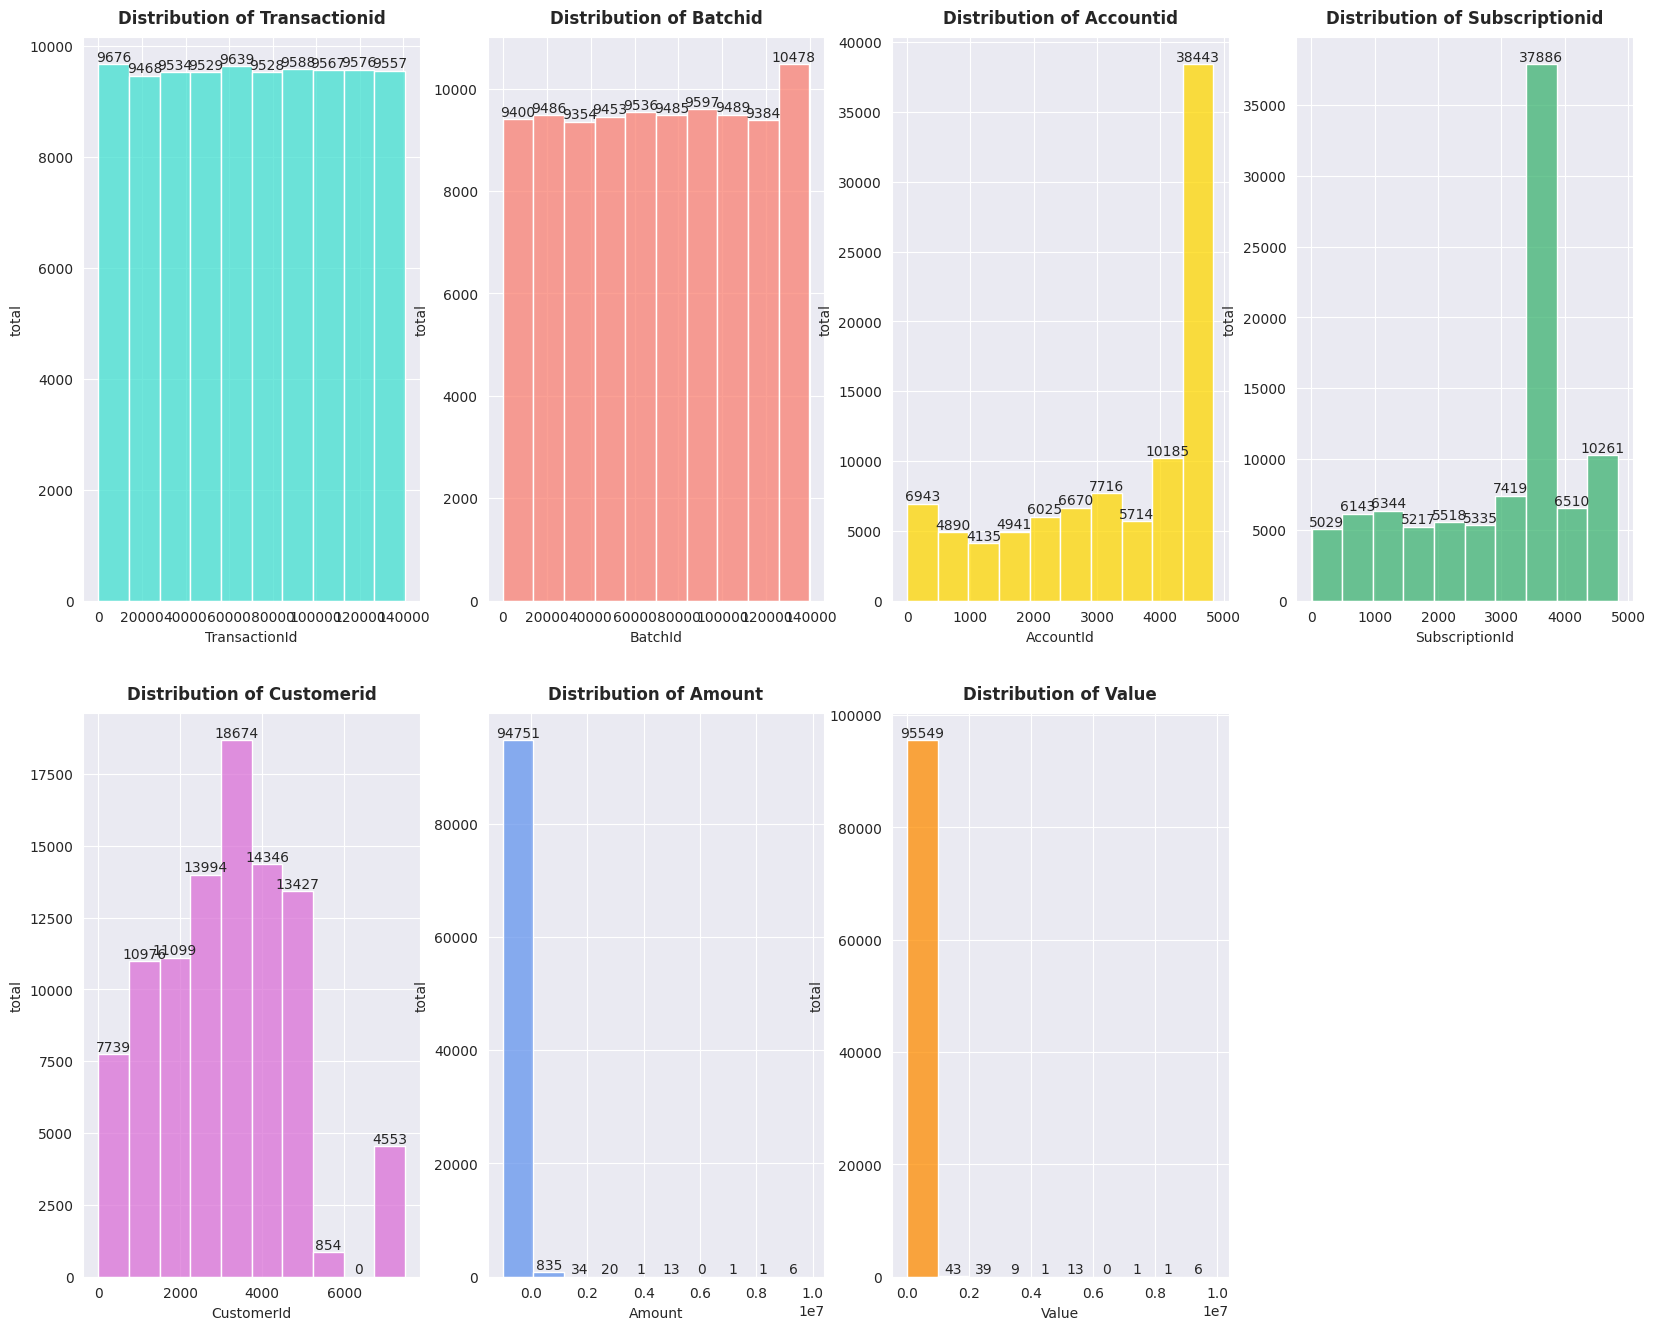

In [12]:
num_column = df.describe().columns.values
fig = plt.figure(figsize=[20,60])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7, 4, i+1)
    ax = sns.histplot(df[col], bins=10, color=new_color_list[i])
    ax.bar_label(ax.containers[0], fontsize=10)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('total', fontsize=10)
    ax.tick_params(labelsize=10)
    title = re.sub('_', ' ', col.title())
    ax.set_title('Distribution of {}'.format(title), fontweight='bold', fontsize=12, pad=10)


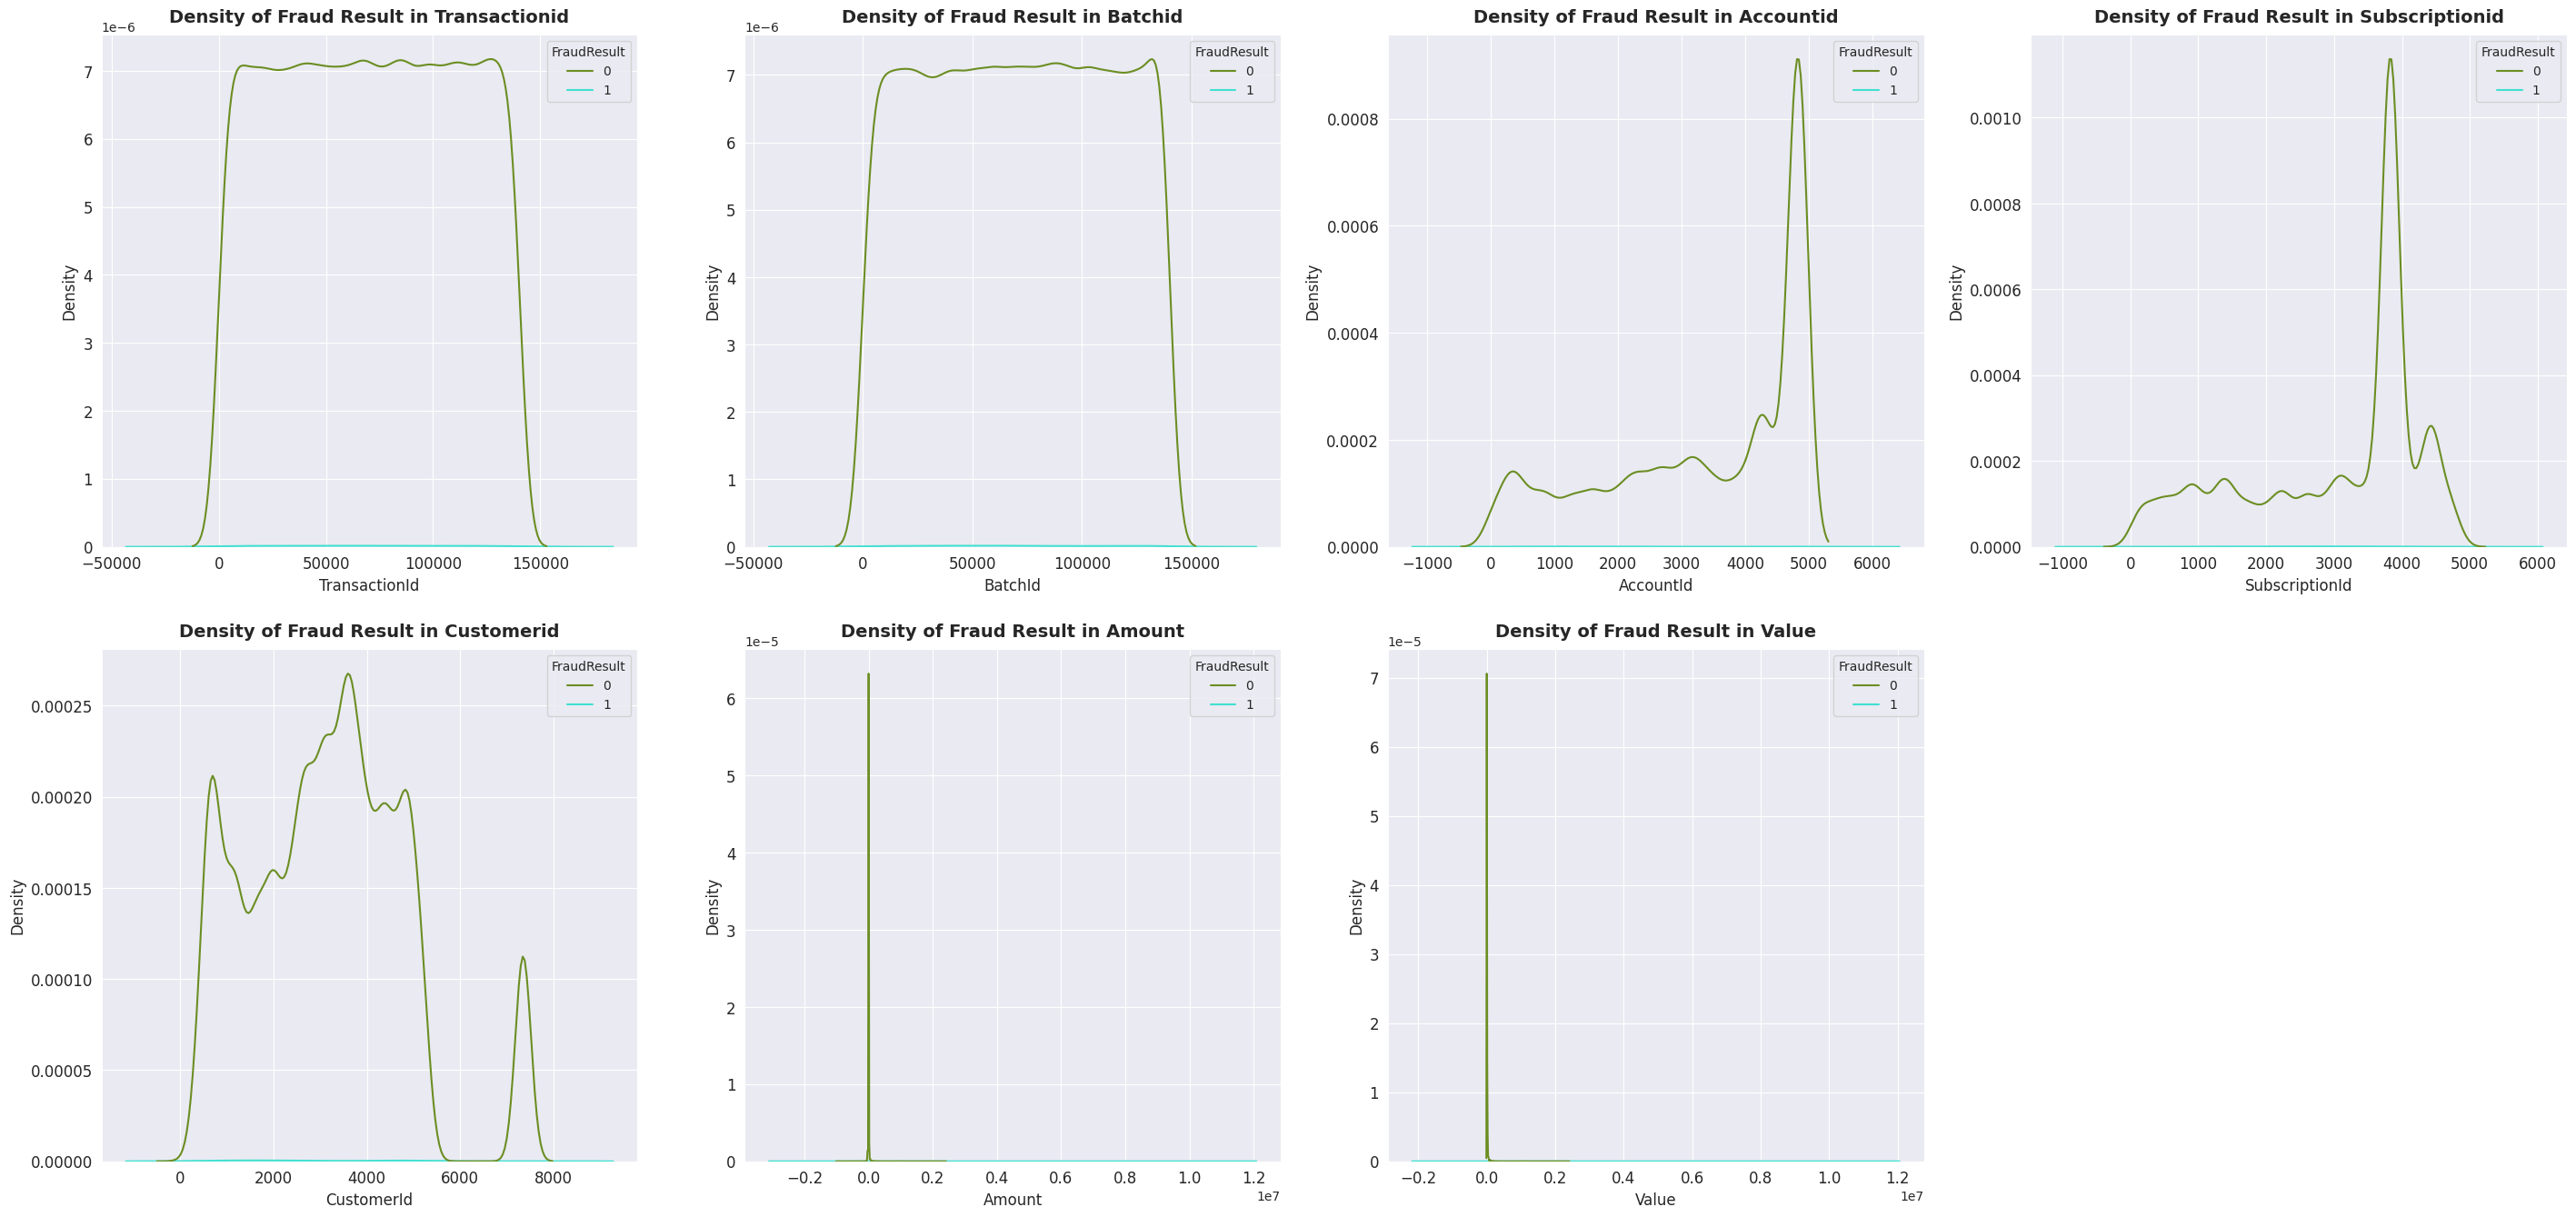

In [13]:
fig = plt.figure(figsize=[35,60])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7, 4, i+1)
    ax = sns.kdeplot(data = df, x=col, hue='FraudResult',  palette=['olivedrab', 'turquoise'])
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.tick_params(labelsize=12)
    title = re.sub('_', ' ', col.title())
    ax.set_title('Density of Fraud Result in {}'.format(title), fontweight='bold', fontsize=14, pad=10)

In the above analysis the distribution of fraud result is 0 in most of numerical columns.

In [14]:
# Missing Value
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [15]:
# duplicated value

df.duplicated().sum()

0

In [16]:
# check outlier numerical data

num_column = df.describe().columns.values
n = 0
for col in num_column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    total = len(df[col][(((df[col] < low_limit)) | (df[col] > high_limit))])
    n = n + total
    print('There are {} row data outlier in columns (varaibels) {}'.format(total, col))


There are 0 row data outlier in columns (varaibels) TransactionId
There are 0 row data outlier in columns (varaibels) BatchId
There are 0 row data outlier in columns (varaibels) AccountId
There are 0 row data outlier in columns (varaibels) SubscriptionId
There are 0 row data outlier in columns (varaibels) CustomerId
There are 24441 row data outlier in columns (varaibels) Amount
There are 9021 row data outlier in columns (varaibels) Value


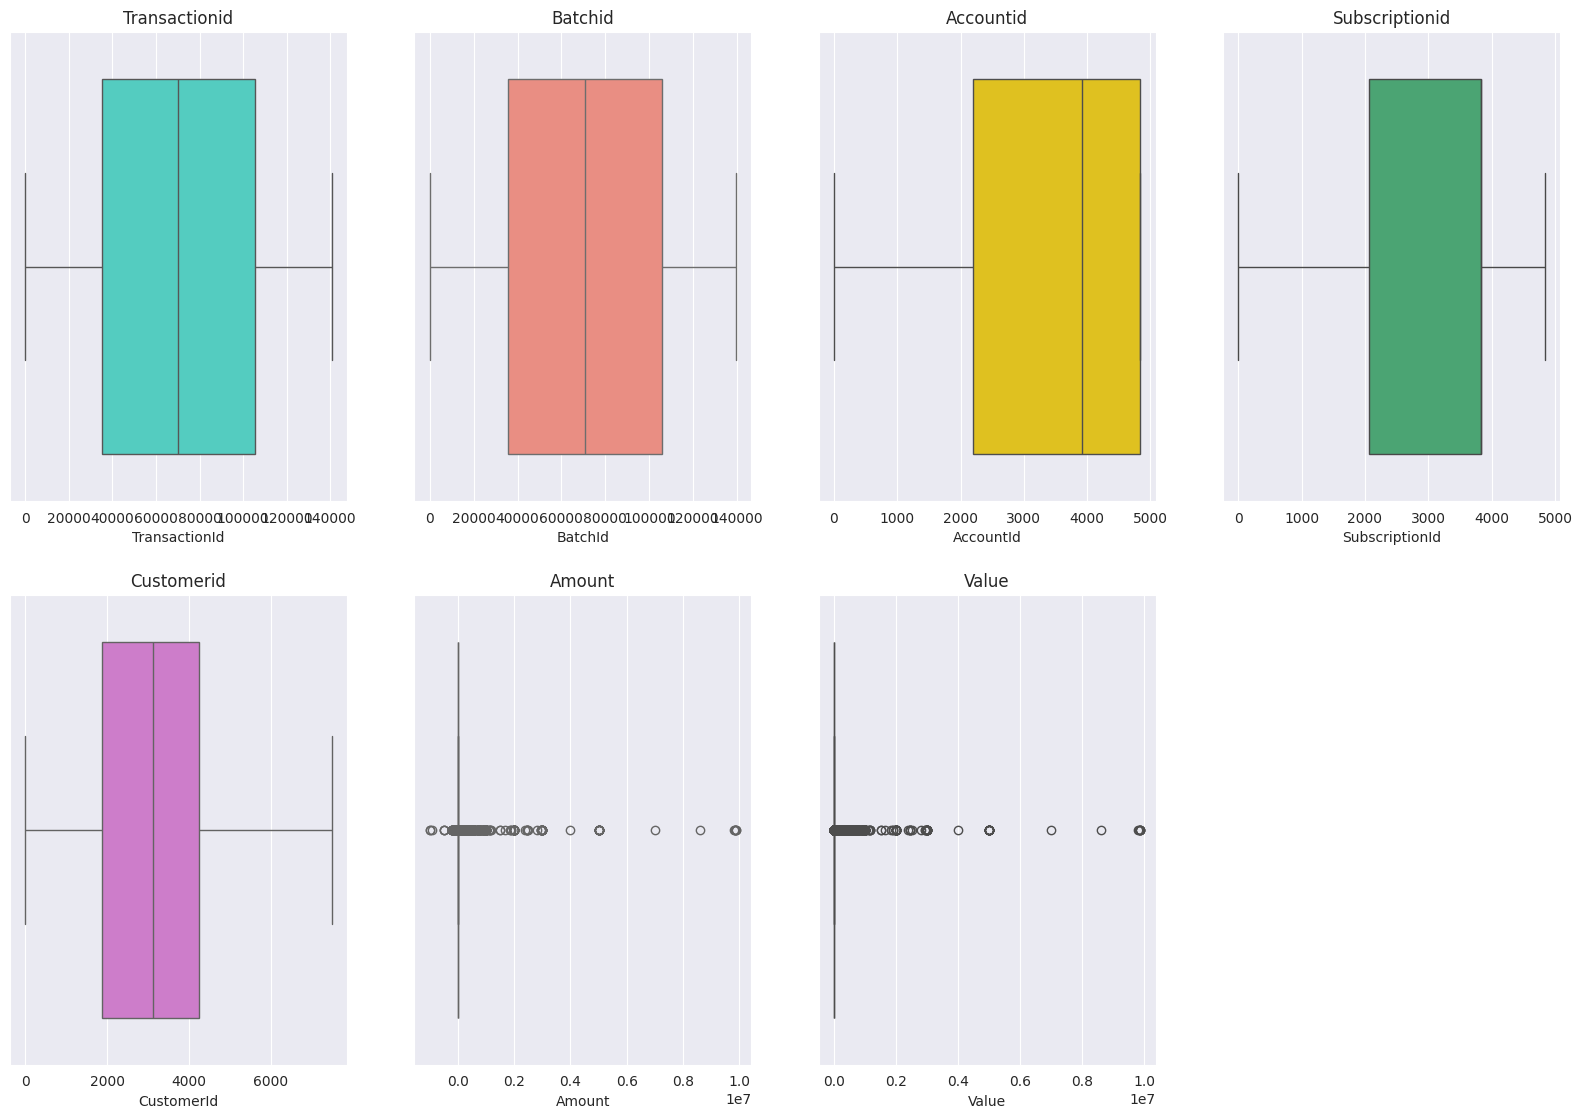

In [17]:
# Visualization with outlier data

fig = plt.figure(figsize=[20,50])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7,4, i+1)
    ax = sns.boxplot(data = df, x=col, color=new_color_list[i])
    title = re.sub('_', ' ', col.title())
    ax.set_title(title)
    ax.set_xlabel(col)

Based on the results of boxplot visualization and checking outlier data using interquartile (IQR) method to determine the upper and lower limits, it can be seen that almost all numerical columns (variables) have no outliers except Amount and Value columns.

In [18]:
# change outlier value with low limit and high limit (IQR Method)

n = 0
for col in num_column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    df[col] = df[col].apply(lambda x: high_limit if x > high_limit else (low_limit if x < low_limit else x))
    total = len(df[col][(((df[col] < low_limit)) | (df[col] > high_limit))])
    n = n + total
    print('There are {} row data outlier in columns (variables) {}'.format(total, col))

There are 0 row data outlier in columns (variables) TransactionId
There are 0 row data outlier in columns (variables) BatchId
There are 0 row data outlier in columns (variables) AccountId
There are 0 row data outlier in columns (variables) SubscriptionId
There are 0 row data outlier in columns (variables) CustomerId
There are 0 row data outlier in columns (variables) Amount
There are 0 row data outlier in columns (variables) Value


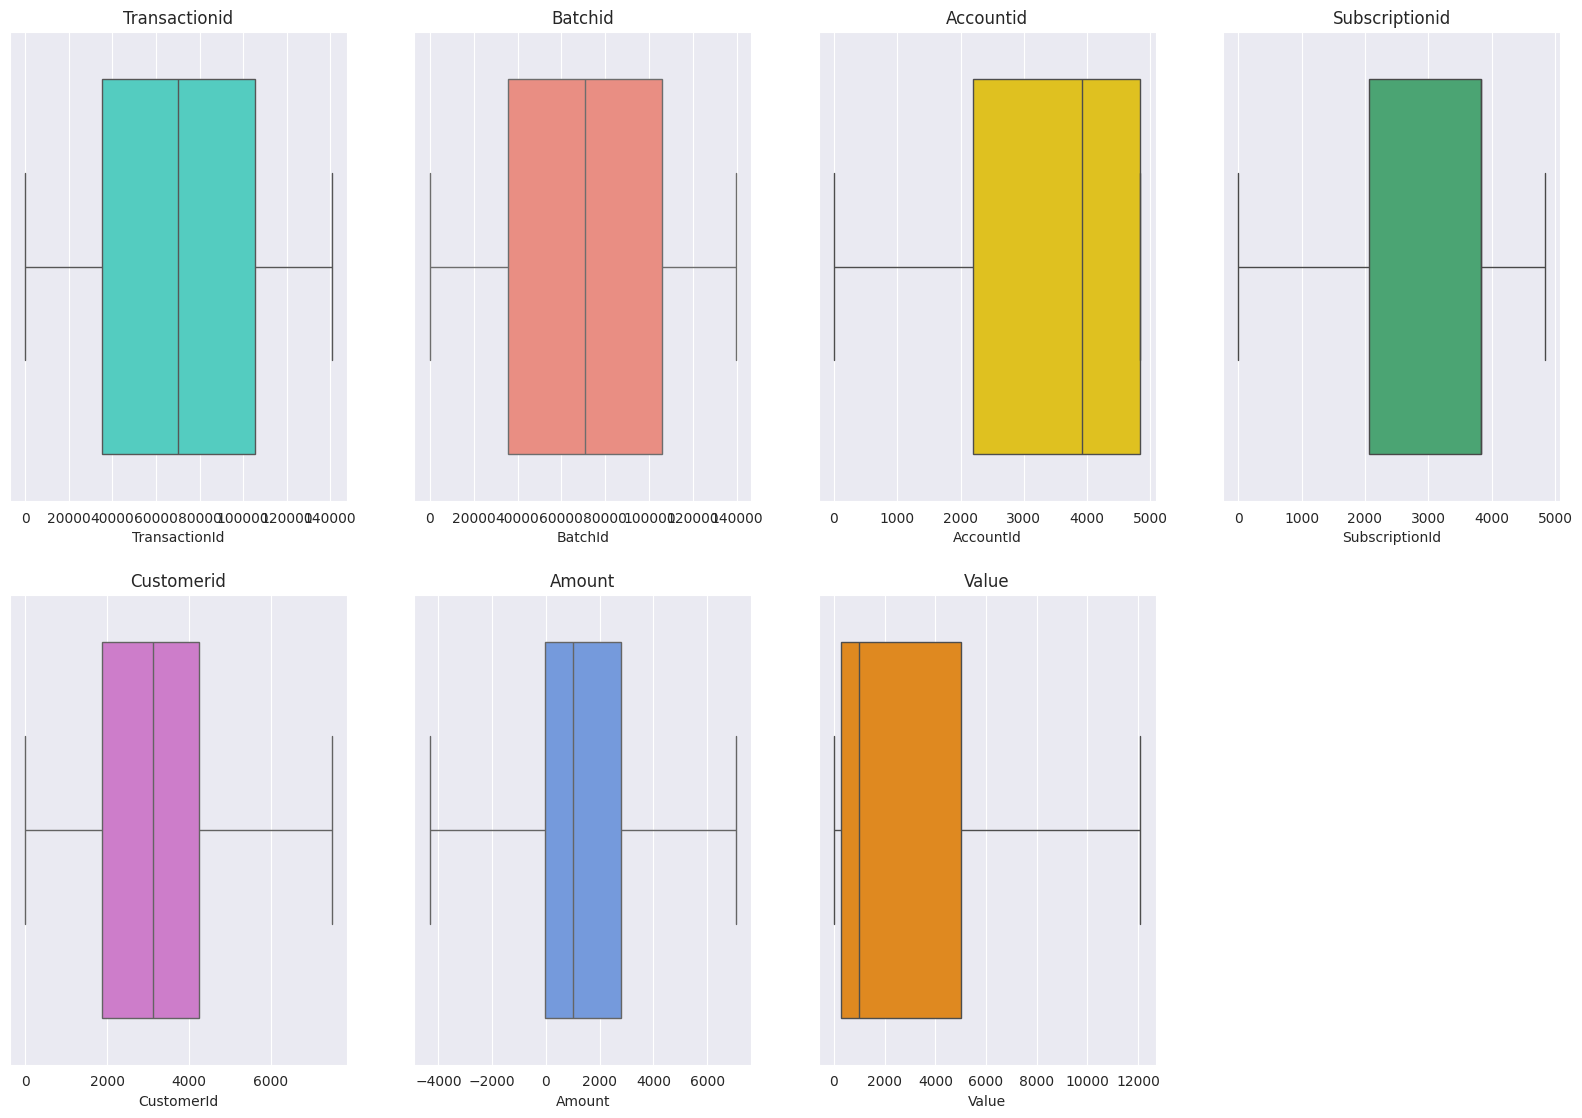

In [19]:
# Visualization without outlier data

fig = plt.figure(figsize=[20,50])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7,4, i+1)
    ax = sns.boxplot(data = df, x=col, color=new_color_list[i])
    title = re.sub('_', ' ', col.title())
    ax.set_title(title)
    ax.set_xlabel(col)

By using the IQR method to determine the upper and lower limits for each column (variable), it can be seen from the visualization results that all numerical columns (variables) are now free from outliers.

# Features Encoding

In [20]:
# Calculate the aggregate features
aggregate_features = df.groupby('CustomerId').agg(
    total_transaction_amount=pd.NamedAgg(column='Amount', aggfunc='sum'),
    average_transaction_amount=pd.NamedAgg(column='Amount', aggfunc='mean'),
    transaction_count=pd.NamedAgg(column='TransactionId', aggfunc='count'),
    stddev_transaction_amount=pd.NamedAgg(column='Amount', aggfunc='std')
).reset_index()


aggregate_features


,CustomerId,total_transaction_amount,average_transaction_amount,transaction_count,stddev_transaction_amount
0,1,-4325.0,-4325.000000,1,NaN
1,2,-4325.0,-4325.000000,1,NaN
2,3,-4325.0,-4325.000000,1,NaN
3,4,-4325.0,-4325.000000,1,NaN
4,5,-4325.0,-4325.000000,1,NaN
...,...,...,...,...,...
3737,7475,-5825.0,-1941.666667,3,2079.112391
3738,7476,-68900.0,-2995.652174,23,1493.425976
3739,7477,-2000.0,-2000.000000,1,NaN
3740,7478,500.0,500.000000,1,NaN


In [21]:
# Extract the features
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionYear'] = df['TransactionStartTime'].dt.year

In [22]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000.0,2018-11-15 02:18:49+00:00,2,0,2,15,11,2018
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20.0,2018-11-15 02:19:08+00:00,2,0,2,15,11,2018
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500.0,2018-11-15 02:44:21+00:00,2,0,2,15,11,2018
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,7075.0,12087.5,2018-11-15 03:32:55+00:00,2,0,3,15,11,2018
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644.0,2018-11-15 03:34:21+00:00,2,0,3,15,11,2018


In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# the categorical columns to be one-hot encoded
categorical_columns = ['CurrencyCode', 'ProductCategory']

# Create a OneHotEncoder object
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the data
one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the one-hot encoded data
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded columns back to the original DataFrame
df = pd.concat([df.drop(columns=categorical_columns), one_hot_encoded_df], axis=1)

# Display the DataFrame with one-hot encoded columns
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,76871,36123,3957,887,4406,256,6,10,3,1000.0,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73770,15642,4841,3829,4406,256,4,6,2,-20.0,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26203,53941,4229,222,4683,256,6,1,3,500.0,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,380,102363,648,2185,988,256,1,21,3,7075.0,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,28195,38780,4841,3829,988,256,4,6,2,-644.0,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


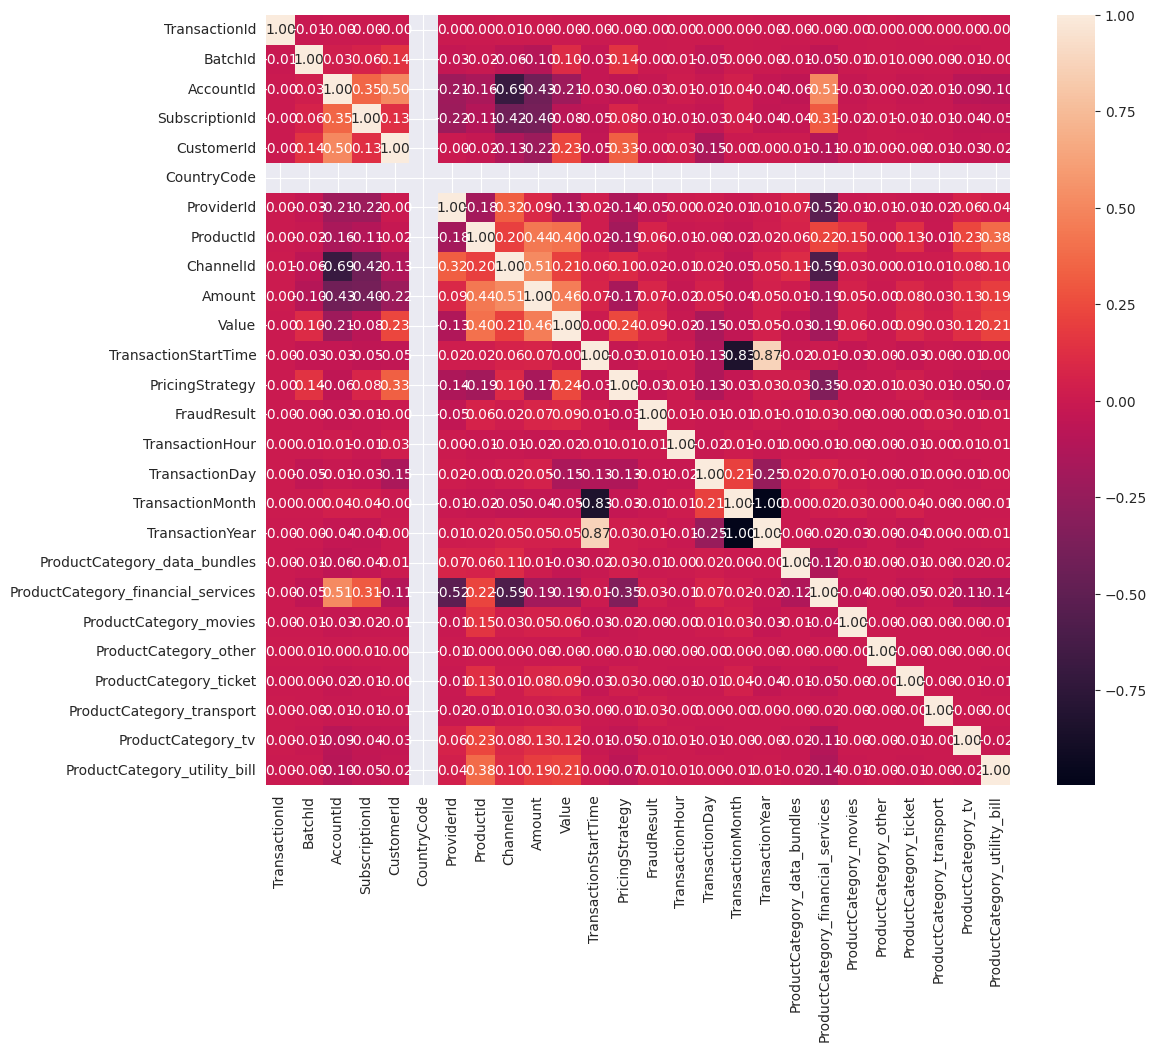

FraudResult                           1.000000
Value                                 0.092405
Amount                                0.074411
ProductId                             0.063452
ProductCategory_financial_services    0.032375
ProductCategory_transport             0.028099
ChannelId                             0.024972
ProductCategory_utility_bill          0.013499
TransactionStartTime                  0.012008
TransactionYear                       0.009811
TransactionHour                       0.008295
ProductCategory_other                -0.000206
BatchId                              -0.000683
TransactionId                        -0.001216
ProductCategory_movies               -0.001925
ProductCategory_ticket               -0.002139
CustomerId                           -0.004549
ProductCategory_tv                   -0.005234
ProductCategory_data_bundles         -0.005888
TransactionDay                       -0.008636
TransactionMonth                     -0.008887
SubscriptionI

In [24]:
# feature selection
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# Select features with high correlation to the target
target_corr = corr_matrix['FraudResult'].sort_values(ascending=False)
print(target_corr)

In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Get the numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.values

# Convert to a pandas Series for easier manipulation
numerical_columns_series = pd.Series(numerical_columns)

# Check if 'CustomerId' is in the columns and drop it if present
if 'CustomerId' in numerical_columns_series.values:
    new_numerical_columns = numerical_columns_series.drop(numerical_columns_series[numerical_columns_series == 'CustomerId'].index)
else:
    new_numerical_columns = numerical_columns_series

# Create a MinMaxScaler object
min_max_scaler = MinMaxScaler()

# Fit and transform the data
df[new_numerical_columns] = min_max_scaler.fit_transform(df[new_numerical_columns])

df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,0.546417,0.258949,0.817355,0.183078,4406,256,6,10,3,0.467105,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.524374,0.112122,1.000000,0.791684,4406,256,4,6,2,0.377632,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.186252,0.386684,0.873554,0.045511,4683,256,6,1,3,0.423246,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.002694,0.733818,0.133678,0.451593,988,256,1,21,3,1.000000,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.200412,0.277996,1.000000,0.791684,988,256,4,6,2,0.322895,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

# Fit and transform the data
df[new_numerical_columns] = standard_scaler.fit_transform(df[new_numerical_columns])

# Display the DataFrame with standardized columns
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,0.160893,-0.847664,0.381677,-1.650828,4406,256,6,10,3,-0.139857,...,11,2018,-0.13096,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114
1,0.084563,-1.352296,0.948332,0.622801,4406,256,4,6,2,-0.457536,...,11,2018,-0.13096,1.052074,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114
2,-1.086272,-0.408646,0.556032,-2.164752,4683,256,6,1,3,-0.295582,...,11,2018,-0.13096,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114
3,-1.721890,0.784424,-1.739433,-0.647711,988,256,1,21,3,1.752200,...,11,2018,-0.13096,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,6.987414
4,-1.037240,-0.782198,0.948332,0.622801,988,256,4,6,2,-0.651880,...,11,2018,-0.13096,1.052074,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114


In [27]:
pip install statsmodels


In [28]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from statsmodels.api import Logit
import seaborn as sns


# Extract RFMS features
df['Recency'] = (df['TransactionStartTime'].max() - df['TransactionStartTime']).dt.days
df['Frequency'] = df.groupby('CustomerId')['TransactionId'].transform('count')
df['Monetary'] = df.groupby('CustomerId')['Amount'].transform('sum')
df['Stability'] = df.groupby('CustomerId')['Amount'].transform('std').fillna(0)

# Display RFMS features
df[['CustomerId', 'Recency', 'Frequency', 'Monetary', 'Stability']].drop_duplicates()




,CustomerId,Recency,Frequency,Monetary,Stability
0,4406,90,119,-24.679380,0.695893
2,4683,90,2,-0.591163,0.000000
3,988,90,38,9.744717,1.083789
5,1432,90,1,0.171593,0.000000
6,2858,90,29,8.051758,1.129934
...,...,...,...,...,...
95640,1579,0,20,7.675359,1.733821
95643,1681,0,13,2.511011,1.773840
95648,2067,0,1,0.171593,0.000000
95649,539,0,16,-0.179027,0.519672


# Modeling

In [29]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CountryCode', 'ProviderId', 'ProductId', 'ChannelId', 'Amount',
       'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'TransactionYear', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_other', 'ProductCategory_ticket',
       'ProductCategory_transport', 'ProductCategory_tv',
       'ProductCategory_utility_bill', 'Recency', 'Frequency', 'Monetary',
       'Stability'],
      dtype='object')

In [75]:
import pandas as pd
import sklearn.metrics as sm
from sklearn import model_selection
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define kfold
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)

# Initialize an empty DataFrame to store model evaluation results
model_list = pd.DataFrame(columns=['model_ml', 'accuracy', 'recall', 'precision', 'f1_score', 'cross_val_score', 'std', 'roc_auc'])

# Function to filter out empty or all-NA DataFrames
def filter_empty_or_all_na(dfs):
    filtered_dfs = []
    for df in dfs:
        if not df.empty and not df.isna().all().all():
            filtered_dfs.append(df)
    return filtered_dfs

# Function to evaluate models
def evaluation(y_test, y_pred, y_prob, model, name_model):
    global model_list
    model_ml = name_model
    accuracy = sm.accuracy_score(y_test, y_pred) * 100.0
    precision = sm.precision_score(y_test, y_pred, zero_division=0) * 100.0
    recall = sm.recall_score(y_test, y_pred, zero_division=0) * 100.0
    f1 = sm.f1_score(y_test, y_pred, zero_division=0) * 100.0
    result = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    roc_auc = sm.roc_auc_score(y_test, y_prob[:, 1]) * 100.0  # Use probabilities of the positive class

    new_row = [{
        'model_ml': model_ml,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'cross_val_score': result.mean() * 100.0,
        'std': result.std() * 100.0,
        'roc_auc': roc_auc
    }]

    for row in new_row:
        row_df = pd.DataFrame([row])
        filtered_dfs = filter_empty_or_all_na([model_list, row_df])
        model_list = pd.concat(filtered_dfs, ignore_index=True)

    print('Model {}'.format(model_ml))
    print("Accuracy Score: %.3f%%" % accuracy)
    print("Precision Score: %.3f%%" % precision)
    print("Recall Score: %.3f%%" % recall)
    print("F1 Score: %.3f%%" % f1)
    print("ROC-AUC Score: %.3f%%" % roc_auc)  # Print ROC-AUC score
    print("Cross Val Score: %.3f%% (%.3f%%)" % (result.mean() * 100.0, result.std() * 100.0))
    print(sm.classification_report(y_test, y_pred))

    # Custom brown colormap
    brown_cmap = ListedColormap(['#d3b8ae', '#b67f7f', '#8b5e5e', '#5c3c3c'])

    # Plot confusion matrix with the custom colormap
    disp = sm.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Not Fraud', 'Fraud'])
    disp.im_.set_cmap(brown_cmap)  # Set the custom colormap
    #plt.colorbar(disp.im_, ax=disp.ax_, orientation='vertical')  # Add color bar with the same colormap
    plt.show()




In [76]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
rfms_features = ['Recency', 'Frequency', 'Monetary', 'Stability']
X = df[rfms_features]
y = df['FraudResult']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Training set: 76529 samples
Testing set: 19133 samples


In [77]:
# Ensure the target variable is numeric
df['FraudResult'] = df['FraudResult'].astype(int)




In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define the features and target variable
rfms_features = ['Recency', 'Frequency', 'Monetary', 'Stability']
X = df[rfms_features]
y = df['FraudResult']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Model LogisticRegression
Accuracy Score: 99.812%
Precision Score: 0.000%
Recall Score: 0.000%
F1 Score: 0.000%
ROC-AUC Score: 89.024%
Cross Val Score: 99.798% (0.057%)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.00      0.00      0.00        36

    accuracy                           1.00     19133
   macro avg       0.50      0.50      0.50     19133
weighted avg       1.00      1.00      1.00     19133



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


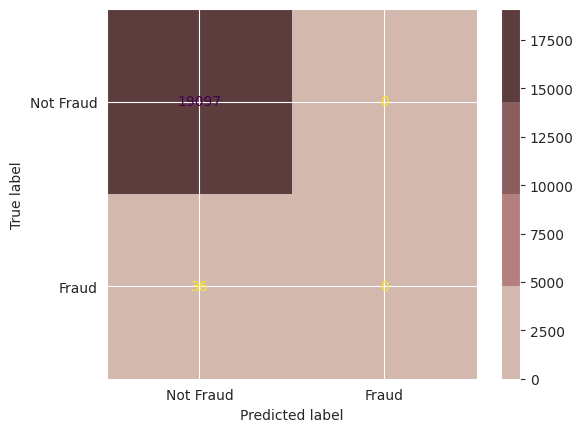

In [79]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

y_prob = LR.predict_proba(X_test)
evaluation(y_test, y_pred, y_prob, LR, 'LogisticRegression')

Model DecisionTreeClassifier()
Accuracy Score: 99.848%
Precision Score: 62.069%
Recall Score: 50.000%
F1 Score: 55.385%
ROC-AUC Score: 85.973%
Cross Val Score: 99.822% (0.049%)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.62      0.50      0.55        36

    accuracy                           1.00     19133
   macro avg       0.81      0.75      0.78     19133
weighted avg       1.00      1.00      1.00     19133



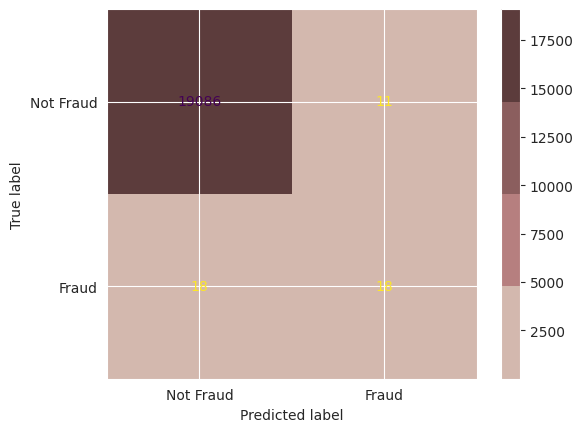

In [84]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
y_prob = DTC.predict_proba(X_test)
evaluation(y_test, y_pred, y_prob, DTC, 'DecisionTreeClassifier()')


Model RandomForestClassifier()
Accuracy Score: 99.854%
Precision Score: 64.286%
Recall Score: 50.000%
F1 Score: 56.250%
ROC-AUC Score: 87.300%
Cross Val Score: 99.828% (0.053%)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.64      0.50      0.56        36

    accuracy                           1.00     19133
   macro avg       0.82      0.75      0.78     19133
weighted avg       1.00      1.00      1.00     19133



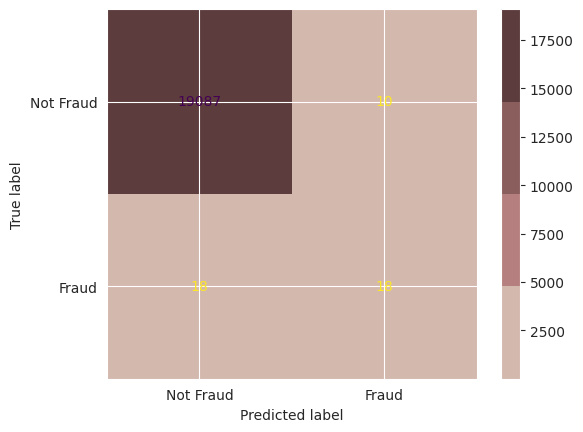

In [85]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
y_prob = RF.predict_proba(X_test)
evaluation(y_test, y_pred, y_prob, RF, 'RandomForestClassifier()')


Model GradientBoostingClassifier()
Accuracy Score: 99.822%
Precision Score: 60.000%
Recall Score: 16.667%
F1 Score: 26.087%
ROC-AUC Score: 89.095%
Cross Val Score: 99.797% (0.055%)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.60      0.17      0.26        36

    accuracy                           1.00     19133
   macro avg       0.80      0.58      0.63     19133
weighted avg       1.00      1.00      1.00     19133



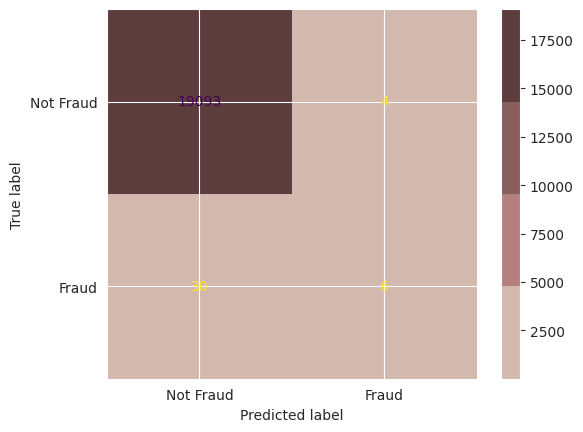

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
GB = GradientBoostingClassifier(random_state=42)

# Train the model
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
y_prob = GB.predict_proba(X_test)
evaluation(y_test, y_pred, y_prob,  GB, 'GradientBoostingClassifier()')




Model SVC()
Accuracy Score: 99.812%
Precision Score: 0.000%
Recall Score: 0.000%
F1 Score: 0.000%
ROC-AUC Score: 89.095%
Cross Val Score: 99.798% (0.057%)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.00      0.00      0.00        36

    accuracy                           1.00     19133
   macro avg       0.50      0.50      0.50     19133
weighted avg       1.00      1.00      1.00     19133



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


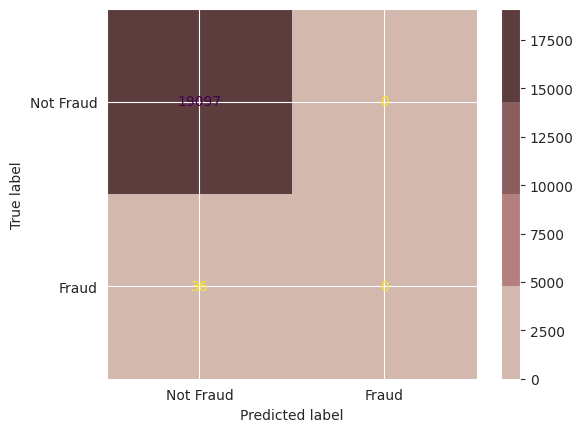

In [90]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
#y_prob = SVM.predict_proba(X_test)
evaluation(y_test, y_pred, y_prob,SVM, 'SVC()')



# Result

In [39]:
ml_df = model_list.sort_values(by='accuracy', ascending=False).reset_index(drop=True)
ml_df

,model_ml,accuracy,precision,recall,f1_score,cross_val_score,std,roc_auc
0,RandomForestClassifier(),99.853656,64.285714,50.000000,56.250000,99.825427,0.055127,74.973818
1,DecisionTreeClassifier(),99.848429,62.068966,50.000000,55.384615,99.822291,0.048808,74.971200
2,GradientBoostingClassifier(),99.822297,60.000000,16.666667,26.086957,99.797203,0.055354,58.322860
3,LogisticRegression(),99.811843,0.000000,0.000000,0.000000,99.798248,0.056689,50.000000
4,SVC(),99.811843,0.000000,0.000000,0.000000,99.798248,0.056689,50.000000


trying other algorithms

Model XGBClassifier()
Accuracy Score: 99.859%
Precision Score: 66.667%
Recall Score: 50.000%
F1 Score: 57.143%
ROC-AUC Score: 97.171%
Cross Val Score: 99.826% (0.052%)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.67      0.50      0.57        36

    accuracy                           1.00     19133
   macro avg       0.83      0.75      0.79     19133
weighted avg       1.00      1.00      1.00     19133



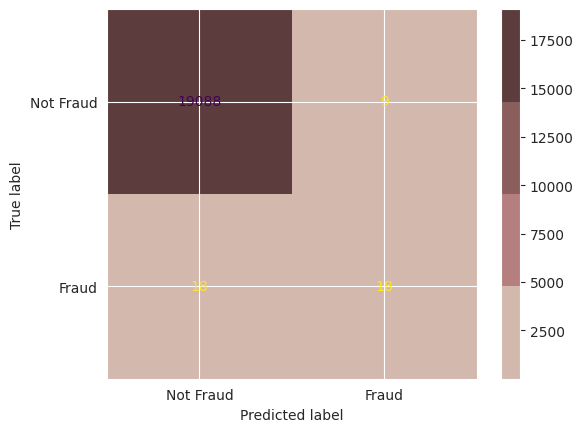

In [91]:
from xgboost import XGBClassifier

# XGBoost Classifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
y_prob = XGB.predict_proba(X_test)
evaluation(y_test, y_pred, y_prob, XGB, 'XGBClassifier()')



[LightGBM] [Info] Number of positive: 157, number of negative: 76372
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 76529, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002052 -> initscore=-6.187126
[LightGBM] [Info] Start training from score -6.187126
[LightGBM] [Info] Number of positive: 179, number of negative: 85916
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 86095, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002079 -> initscore=-6.173740
[LightGBM]

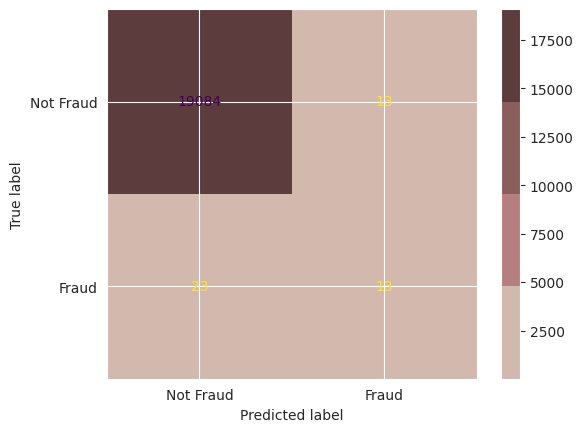

In [92]:
from lightgbm import LGBMClassifier

# LightGBM Classifier
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_test)
y_prob = LGBM.predict_proba(X_test)
evaluation(y_test, y_pred, y_prob,LGBM, 'LGBMClassifier()')




In [42]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.0 MB/s eta 0:00:00


Model CatBoostClassifier()
Accuracy Score: 99.848%
Precision Score: 62.963%
Recall Score: 47.222%
F1 Score: 53.968%
ROC-AUC Score: 96.534%
Cross Val Score: 99.822% (0.050%)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.63      0.47      0.54        36

    accuracy                           1.00     19133
   macro avg       0.81      0.74      0.77     19133
weighted avg       1.00      1.00      1.00     19133



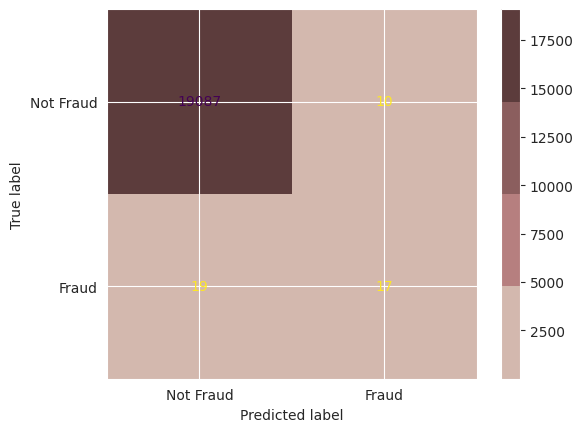

In [93]:
from catboost import CatBoostClassifier

# CatBoost Classifier
CatB = CatBoostClassifier(silent=True)
CatB.fit(X_train, y_train)
y_pred = CatB.predict(X_test)
y_prob = CatB.predict_proba(X_test)
evaluation(y_test, y_pred, y_prob, CatB, 'CatBoostClassifier()')



In [44]:
ml_df = model_list.sort_values(by='accuracy', ascending=False).reset_index(drop=True)
ml_df

,model_ml,accuracy,precision,recall,f1_score,cross_val_score,std,roc_auc
0,XGBClassifier(),99.858883,66.666667,50.000000,57.142857,99.826472,0.051891,74.976436
1,RandomForestClassifier(),99.853656,64.285714,50.000000,56.250000,99.825427,0.055127,74.973818
2,DecisionTreeClassifier(),99.848429,62.068966,50.000000,55.384615,99.822291,0.048808,74.971200
3,CatBoostClassifier(),99.848429,62.962963,47.222222,53.968254,99.822291,0.050134,73.584929
4,GradientBoostingClassifier(),99.822297,60.000000,16.666667,26.086957,99.797203,0.055354,58.322860
5,LogisticRegression(),99.811843,0.000000,0.000000,0.000000,99.798248,0.056689,50.000000
6,SVC(),99.811843,0.000000,0.000000,0.000000,99.798248,0.056689,50.000000
7,LGBMClassifier(),99.811843,50.000000,36.111111,41.935484,99.720891,0.120474,68.021519


In [95]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBClassifier
xgb = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Define the evaluation function if not already defined
def evaluation(y_true, y_pred, model, name_model):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

    print(f"Evaluation for {name_model}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate the best model
evaluation(y_test, y_pred, best_model, 'Tuned XGBClassifier')


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}
Evaluation for Tuned XGBClassifier:
Accuracy: 0.998588825589296
Precision: 0.68
Recall: 0.4722222222222222
F1 Score: 0.5573770491803278

Confusion Matrix:
 [[19089     8]
 [   19    17]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.68      0.47      0.56        36

    accuracy                           1.00     19133
   macro avg       0.84      0.74      0.78     19133
weighted avg       1.00      1.00      1.00     19133



In [96]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBClassifier
xgb_Rn = XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_Rn,
    param_distributions=param_distributions,
    n_iter=100,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Define the evaluation function if not already defined
def evaluation(y_true, y_pred, model, name_model):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

    print(f"Evaluation for {name_model}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate the best model
evaluation(y_test, y_pred, best_model, 'Tuned XGBClassifier with RandomizedSearchCV')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Evaluation for Tuned XGBClassifier with RandomizedSearchCV:
Accuracy: 0.998588825589296
Precision: 0.68
Recall: 0.4722222222222222
F1 Score: 0.5573770491803278

Confusion Matrix:
 [[19089     8]
 [   19    17]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.68      0.47      0.56        36

    accuracy                           1.00     19133
   macro avg       0.84      0.74      0.78     19133
weighted avg       1.00      1.00      1.00     19133



In [97]:
ml_df = model_list.sort_values(by='accuracy', ascending=False).reset_index(drop=True)
ml_df

,model_ml,accuracy,precision,recall,f1_score,cross_val_score,std,roc_auc
0,XGBClassifier(),99.858883,66.666667,50.000000,57.142857,99.826472,0.051891,97.171313
1,RandomForestClassifier(),99.853656,64.285714,50.000000,56.250000,99.822291,0.052892,89.023800
2,RandomForestClassifier(),99.853656,64.285714,50.000000,56.250000,99.827518,0.052528,87.300143
3,DecisionTreeClassifier(),99.848429,62.068966,50.000000,55.384615,99.822291,0.048808,89.023800
4,DecisionTreeClassifier(),99.848429,62.068966,50.000000,55.384615,99.822291,0.048808,85.972855
5,CatBoostClassifier(),99.848429,62.962963,47.222222,53.968254,99.822291,0.050134,96.534141
6,GradientBoostingClassifier(),99.822297,60.000000,16.666667,26.086957,99.797203,0.055354,89.023800
7,GradientBoostingClassifier(),99.822297,60.000000,16.666667,26.086957,99.797203,0.055354,89.095291
8,LogisticRegression,99.811843,0.000000,0.000000,0.000000,99.798248,0.056689,89.023800
9,SVC(),99.811843,0.000000,0.000000,0.000000,99.798248,0.056689,89.095291


In [99]:

# Save the trained model to a pickle file
with open('XGBClassifier_model.pkl', 'wb') as file:
    pickle.dump(XGB, file)


In [101]:
import pickle

# Load the trained model from the pickle file
with open('XGBClassifier_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions with the loaded model
loaded_y_pred = loaded_model.predict(X_test)
loaded_y_prob = loaded_model.predict_proba(X_test)

# Evaluate the loaded model
evaluation(y_test, loaded_y_pred, loaded_model, 'Loaded XGBClassifier')


Evaluation for Loaded XGBClassifier:
Accuracy: 0.998588825589296
Precision: 0.6666666666666666
Recall: 0.5
F1 Score: 0.5714285714285715

Confusion Matrix:
 [[19088     9]
 [   18    18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.67      0.50      0.57        36

    accuracy                           1.00     19133
   macro avg       0.83      0.75      0.79     19133
weighted avg       1.00      1.00      1.00     19133

